# Jamboree Education - Linear Regression

**About Jamboree**

Jamboree is India’s leading institute for study abroad test prep and admission counselling. With the highest scores for GMAT and GRE in the industry and admission offers from the best universities worldwide, Jamboree has helped thousands of students get into their dream universities. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
    They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

**Problem Statement**

* To determine what factors are important in graduate admissions and how these factors are interrelated among themselves.
* To predict a fair idea about their chances of admission for a particular university.

**Column Profiling:**

> * **Serial No.** (Unique row ID)
> * **GRE Score** (out of 340)

>The Graduate Record Examinations (GRE) is a the most popular test for graduate schools' admission, it consists of three sections : Analytical Writing, Verbal and Quantitative.
   
> * **TOEFL Score** (out of 120)

>Test of English as a Foreign Language (TOEFL) is a very popular test for English language amongst universities worldwide, it is marked based on three sections: Reading, Listening, Speaking, and Writing.   
   
> * **University Rating** (out of 5)

>The rating of the university the student completed his undergraduate degree from.

> * **Statement of Purpose and Letter of Recommendation Strength** (out of 5)

>Letter of Recommendation (LOR) is a letter written by a person that knows the student and recommends that the university accept his admission, this person can be a professor in his undergraduate degree or a professional whom the student have worked with.

>Statement of Purpose (SOP) is a letter written by the student himself to state his purpose and motivation for completing a graduate degree in addition to his goals while and after he completes his study. Many universities find this letter significant because it better describe the student from a personal perspective.

> * **Undergraduate GPA** (out of 10)

>Cumulative Grade Points Average (CGPA) is a measure of a student's marks thus his performance in his undergraduate degree.

> * **Research Experience** (either 0 or 1)
> * **Chance of Admit** (ranging from 0 to 1)

**Here Chance of Admit is the target/dependent variable, which we have to predict using other features.**

In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
df = pd.read_csv("Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Examine shape of dataset
df.shape

(500, 9)

In [4]:
# drop the irrelevant column 
df = df.drop(['Serial No.'], axis=1)

In [5]:
# check for the data types of values provided and see if any columns has the missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


* The dataset has 500 rows and 8 columns.
* There is no missing values in the data and all features are of numerical datatype.

In [6]:
#renaming some column features to omit trailing spaces
df.rename(columns = {'Chance of Admit ' :'Chance of Admit', 'LOR ':'LOR'}, inplace = True)

In [7]:
#Check for the null values in dataset
null_total = df.isna().sum().sort_values(ascending = False)
null_percent =((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
null = pd.concat([null_total,null_percent.round(4)],axis=1,keys=['Missing Total','Missing Percent'])
null

,Missing Total,Missing Percent
GRE Score,0,0.0
TOEFL Score,0,0.0
University Rating,0,0.0
SOP,0,0.0
LOR,0,0.0
CGPA,0,0.0
Research,0,0.0
Chance of Admit,0,0.0


There is no null values in any of the features of the data.

In [8]:
## Statistical analysis of numerical columns in the dataset
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.472,11.295,290.00,308.000,317.00,325.00,340.00
TOEFL Score,500.0,107.192,6.082,92.00,103.000,107.00,112.00,120.00
University Rating,500.0,3.114,1.144,1.00,2.000,3.00,4.00,5.00
SOP,500.0,3.374,0.991,1.00,2.500,3.50,4.00,5.00
LOR,500.0,3.484,0.925,1.00,3.000,3.50,4.00,5.00
CGPA,500.0,8.576,0.605,6.80,8.128,8.56,9.04,9.92
Research,500.0,0.560,0.497,0.00,0.000,1.00,1.00,1.00
Chance of Admit,500.0,0.722,0.141,0.34,0.630,0.72,0.82,0.97


**Observations :**

* GRE score ranges from 290 to 340 and there is no outliers present in the records.The mean of GRE score seems equivalent to median,which gives the idea that data is normally distributed. 
* TOEFL score ranges from 92 to 120 and there is no outliers present in the records. Similar to GRE score, mean value is equivalent to median ie, it seems data is normally distributed.
* CGPA ranges from 6.80 to 9.92 with no outliers. Also, the mean and median of CGPA seems to be equivalent.which seems  distribution is normal. distributed.
* Change of Admit ranges from 0.34 to 0.97 in the dataset provided. Also, median and mean values are equal. Hence, chance of admit  also seems to be normally distributed.
* Research have values between 0 and 1 whereas University rating,SOP,LOR have values between 1 and 5.

In [9]:
# Display the no. of unique values in each column
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [10]:
df.duplicated().sum()

0

No dupicates records found.

In [11]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit']

## Exploratory Data Analysis

#### > UNIVARIATE ANALYSIS for  GRE Score, TOEFL Score, CGPA and Chance of Admit

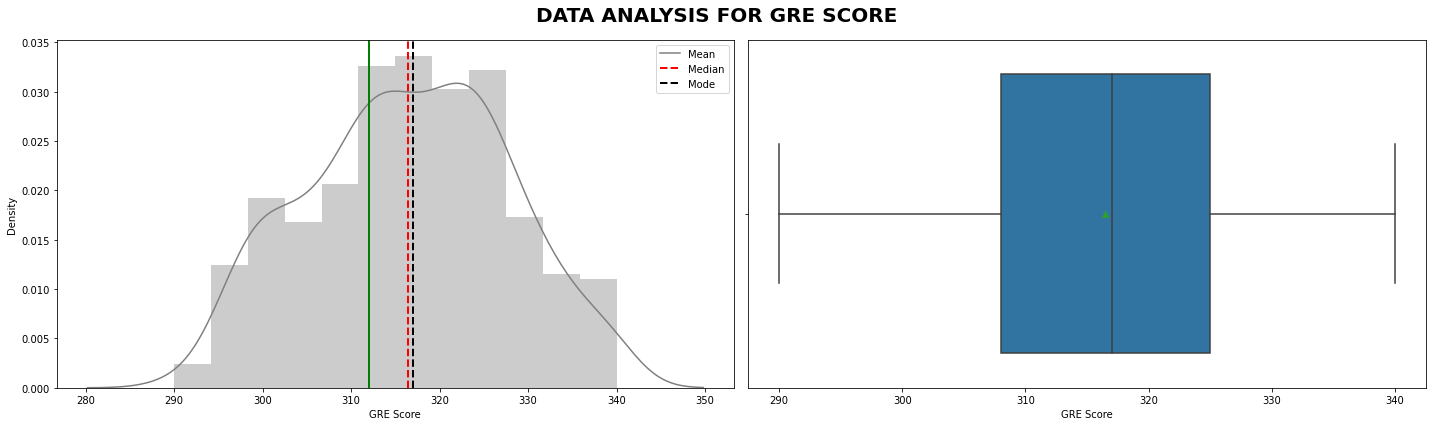

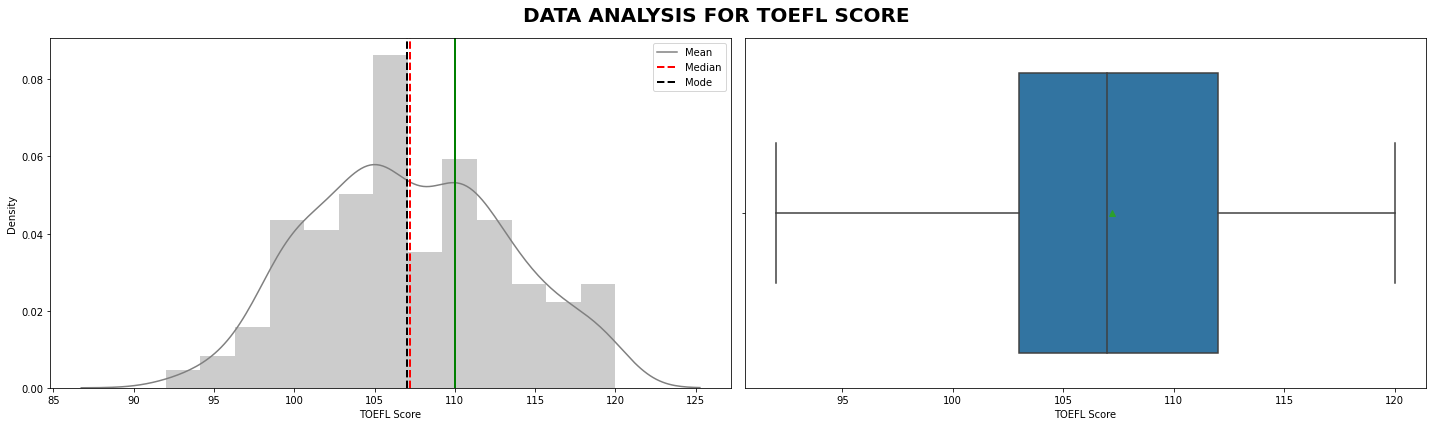

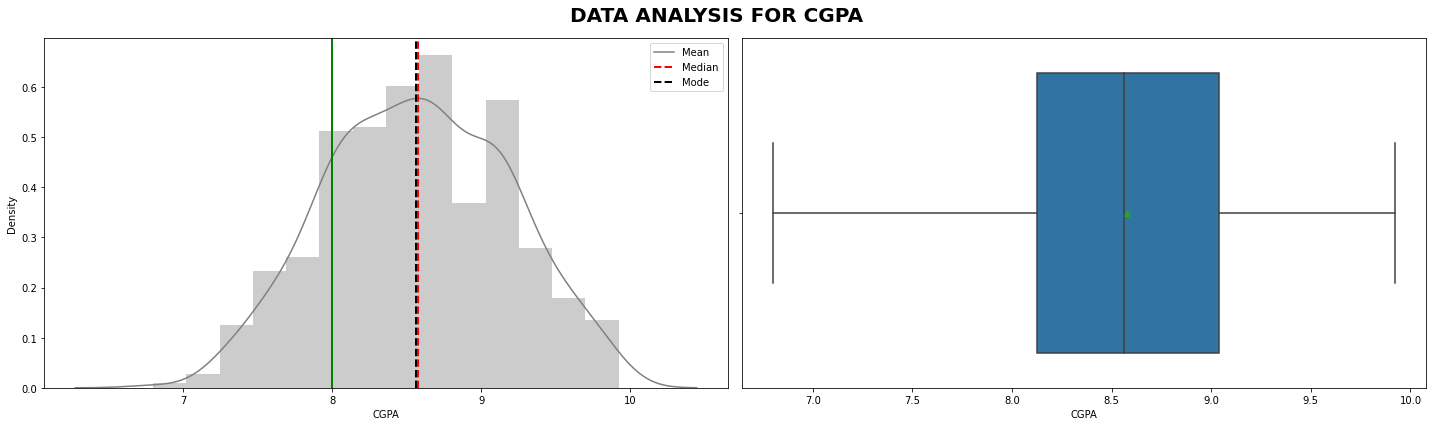

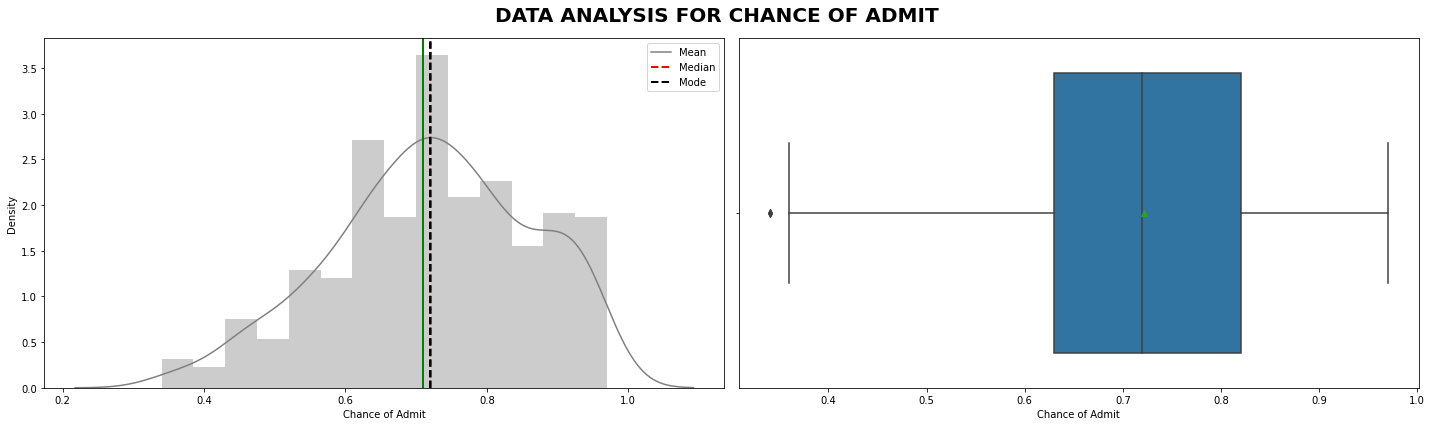

In [12]:
# Univariate analysis for continuous variables

def num_feat(col_data):    
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
    fig.suptitle("DATA ANALYSIS FOR "+ col_data.name.upper()  , fontsize=20, fontweight='bold')
    sns.distplot(col_data, kde=True, ax=ax[0], color = 'grey') # distribution plot
    
    ax[0].axvline(col_data.mean(), color='r', linestyle='--',linewidth=2)
    ax[0].axvline(col_data.median(), color='k', linestyle='dashed', linewidth=2)
    ax[0].axvline(col_data.mode()[0],color='g',linestyle='solid',linewidth=2)    
    
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1]) # boxplot
    ax[0].legend({'Mean':col_data.mean(),'Median':col_data.median(),'Mode':col_data.mode()})
    plt.tight_layout()


num_features = ['GRE Score', 'TOEFL Score', 'CGPA','Chance of Admit']
for i in num_features:
    num_feat(df[i])

**Observations :**

* Outliers are absent in GRE Score,TOEFL Score & CGPA whereas a few outliers are visible in Chance of Admit.
* The distribution of Chance of Admit is slightly left skewed.
* For GRE Score,TOEFL Score & CGPA, the distribution seems to be normal and can be confirmed by QQ-plot.
* CGPA scores are distributed between 6.9 to 9.7.More than 70 applicants have the CGPA of 8.56.A saturation can be observed in the distribution which implies as a great number of applicants have a CGPA between 7.90 to 9.25.

#### > UNIVARIATE ANALYSIS for University Rating, SOP, LOR and Research

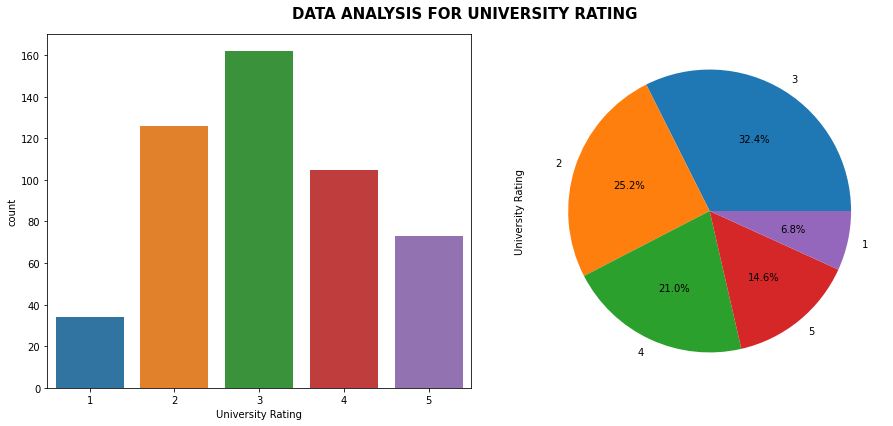

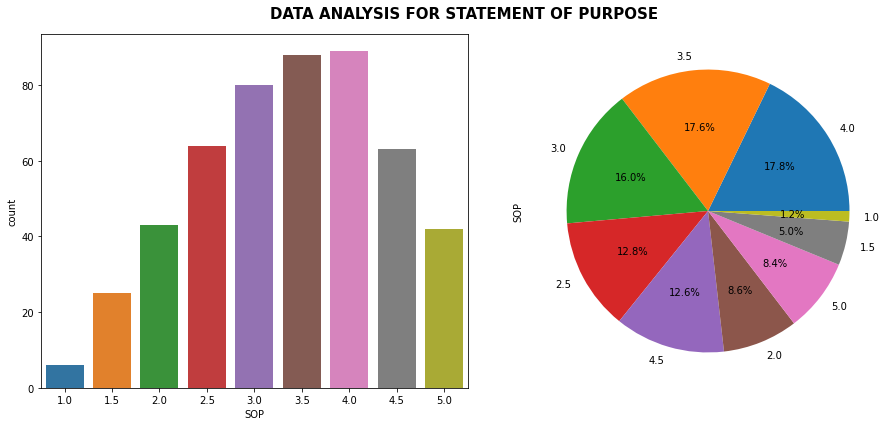

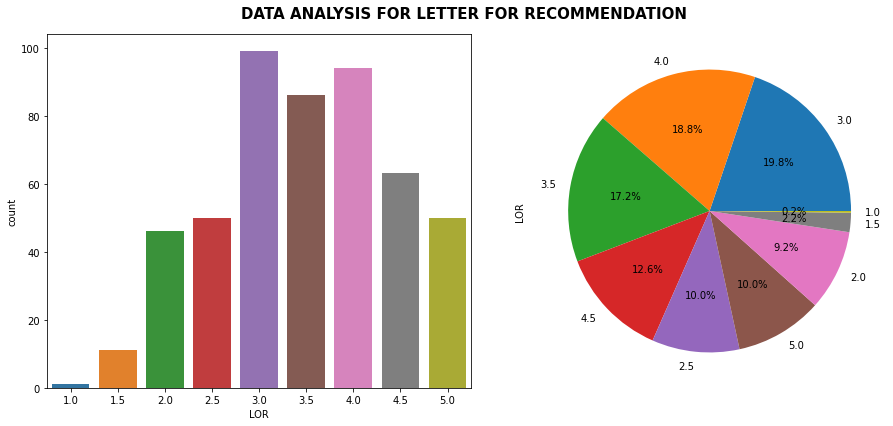

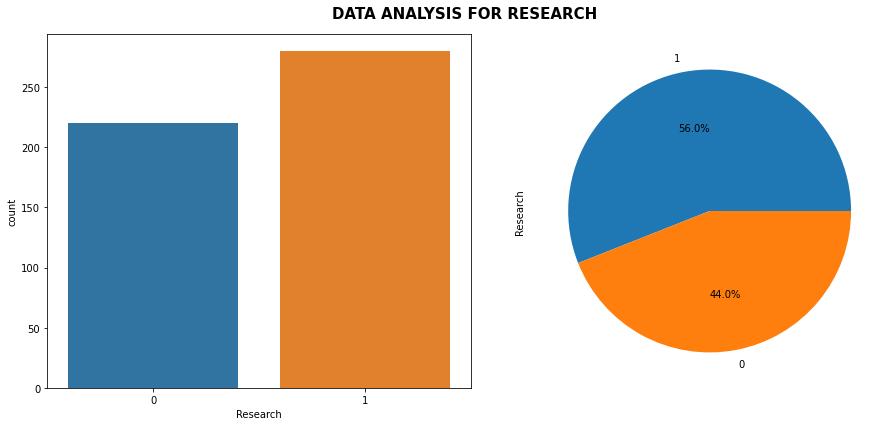

In [13]:
# Univariate Categorical type variables
def cat_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(13,6))
    
    if col_data.name == "SOP":
        fig.suptitle("DATA ANALYSIS FOR STATEMENT OF PURPOSE",fontsize=15,fontweight='bold')
    elif col_data.name == "LOR":
        fig.suptitle("DATA ANALYSIS FOR LETTER FOR RECOMMENDATION",fontsize=15,fontweight='bold')
    else:
        fig.suptitle("DATA ANALYSIS FOR "+ col_data.name.upper()  , fontsize=15, fontweight='bold')
        
    sns.countplot(col_data,ax=ax[0])
    col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
    plt.tight_layout()
    
    
cat_features = ['University Rating', 'SOP', 'LOR','Research']
for i in cat_features:
    #print(df[i].value_counts())
    #print("_"*80)
    cat_feat(df[i])

**Observations :**
* Majority of the universities from which the applicants completed their graduation have a rating of 3, which is highest.A few applicants are from universities rated as 1.
* Most of the applicants have received 3.5 to 4.0 stars in their SOP.Rating distribution can be grouped into 3 categories ie, 1.0 to 2.1 (low), 2.5 to 3.6 (medium) and 3.9 to 5.0 (high). This provides a really well quantified information on strength of statement of purpose.
* Most applicants have a recommendation ratting of 3.0.A very good number of applicants are having LOR ratting between 3 and 4. The outlier observed in boxplot is basically just one applicant having the lowest rating of 1.
* Out of 500 applicants approx 280 applicants have opted for research.In precentage 56% applicants have preference to opt for research.


#### > BIVARIATE ANALYSIS  

**GRE Score v/s other features**

<Figure size 1440x504 with 0 Axes>

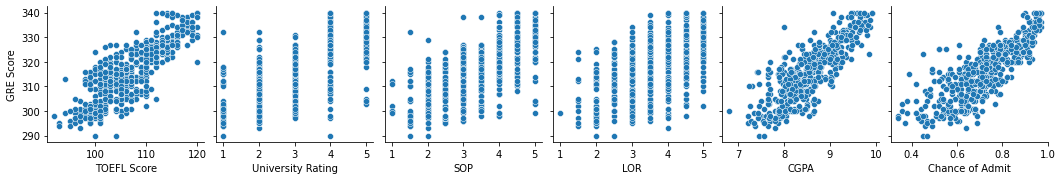

In [14]:
plt.figure(figsize=(20, 7));
sns.pairplot(data=df, y_vars=["GRE Score"] , x_vars=[ "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA","Chance of Admit"])

GRE score is strongly positive correlated with TOEFL score and CGPA.

**TOEFL Score v/s other features**

<Figure size 1440x504 with 0 Axes>

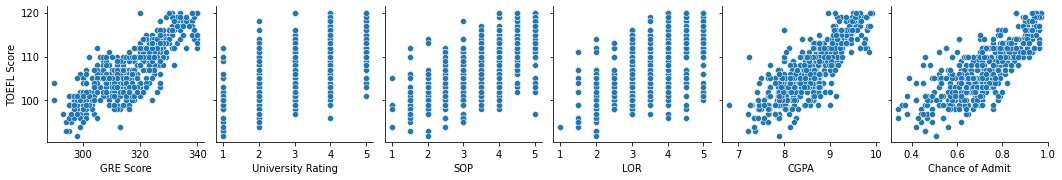

In [15]:
plt.figure(figsize=(20, 7));
sns.pairplot(data=df, y_vars=["TOEFL Score"] , x_vars=[ "GRE Score", "University Rating", "SOP", "LOR", "CGPA","Chance of Admit"])

TOEFL score is strongly positive correlated with GRE score and CGPA.

**University Rating v/s other features**

<Figure size 1440x504 with 0 Axes>

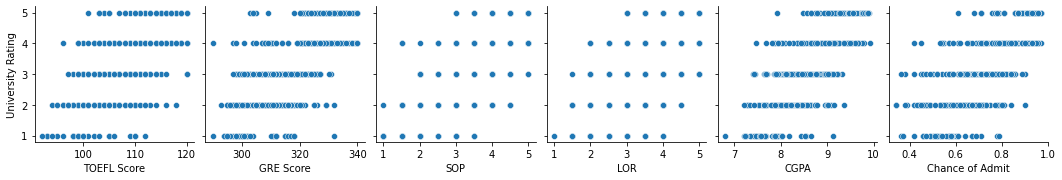

In [16]:
plt.figure(figsize=(20, 7));
sns.pairplot(data=df, y_vars=["University Rating"] , x_vars=[ "TOEFL Score","GRE Score" , "SOP", "LOR", "CGPA","Chance of Admit"])

**SOP v/s other features**

<Figure size 1440x504 with 0 Axes>

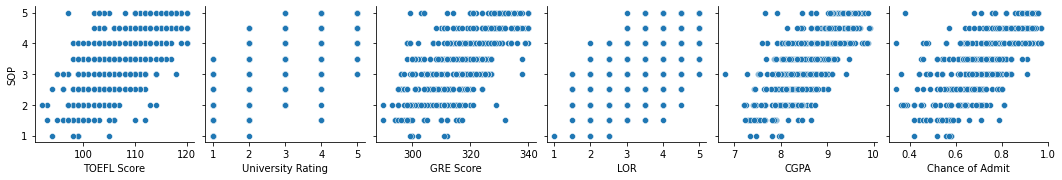

In [17]:
plt.figure(figsize=(20, 7));
sns.pairplot(data=df, y_vars=[ "SOP"] , x_vars=[ "TOEFL Score", "University Rating","GRE Score", "LOR", "CGPA","Chance of Admit"])

**LOR v/s other features**

<Figure size 1440x504 with 0 Axes>

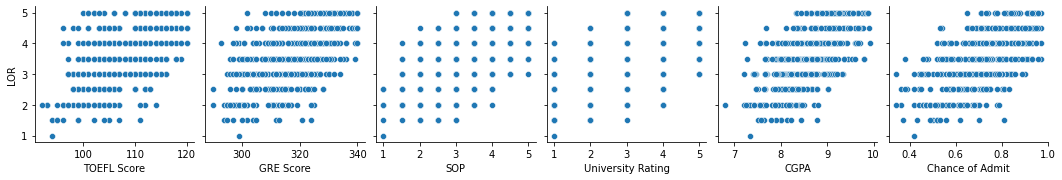

In [18]:
plt.figure(figsize=(20, 7));
sns.pairplot(data=df, y_vars=["LOR"] , x_vars=[ "TOEFL Score","GRE Score" , "SOP","University Rating", "CGPA","Chance of Admit"])

**CGPA v/s other features**

<Figure size 1440x504 with 0 Axes>

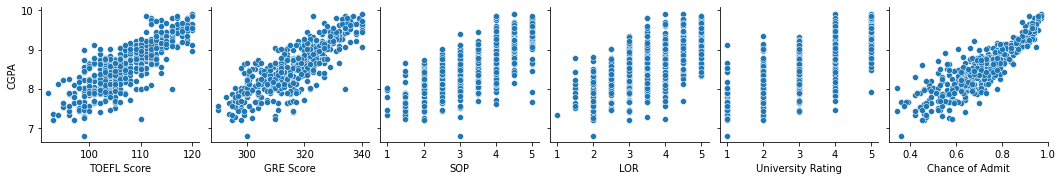

In [19]:
plt.figure(figsize=(20, 7));
sns.pairplot(data=df, y_vars=["CGPA"] , x_vars=[ "TOEFL Score","GRE Score" , "SOP", "LOR","University Rating","Chance of Admit"])

CGPA is strongly positive correlated with GRE score, TOEFL score and Chance of Admit 

**Chance of Admit v/s other features**

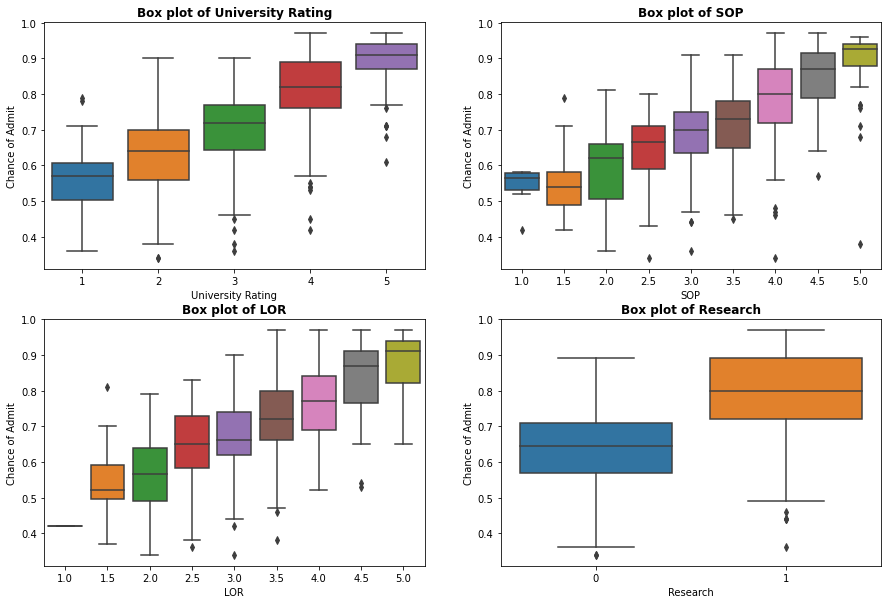

In [20]:
#Function to plot a list of categorical variables together
def cate_box_plot(colname,y):
    fig = plt.figure(figsize=(15, 10))    
    for var in colname:
        plt.subplot(2,2,colname.index(var)+1)
        sns.boxplot(x = var, y = y, data = df)
        plt.title("Box plot of " + var, fontweight="bold")
    plt.show()
    
cate_box_plot(['University Rating', 'SOP', 'LOR','Research'],'Chance of Admit')

The boxplot shows an upward trend for each categorical-like variable. A higher rating or value increases the chance of admission

<Figure size 1440x504 with 0 Axes>

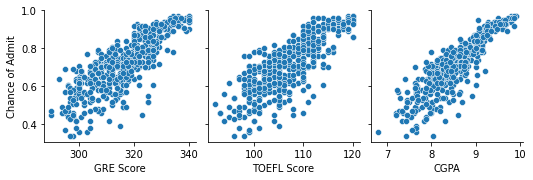

In [21]:
plt.figure(figsize=(20, 7));
sns.pairplot(data=df, y_vars=["Chance of Admit"] , x_vars=["GRE Score", "TOEFL Score","CGPA"])

>Chance of Admit is strongly positive correlated with GRE score, TOEFL score and CGPA. This implies that higher scores in GRE and TOEFL and better CGPA can potentially increase the chances of graduation admissions.

#### >MULTIVARIATE ANALYSIS

In [22]:
corr_coef = df.corr().round(3)
corr_coef

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000,0.827,0.635,0.613,0.525,0.826,0.563,0.810
TOEFL Score,0.827,1.000,0.650,0.644,0.542,0.811,0.467,0.792
University Rating,0.635,0.650,1.000,0.728,0.609,0.705,0.427,0.690
SOP,0.613,0.644,0.728,1.000,0.664,0.712,0.408,0.684
LOR,0.525,0.542,0.609,0.664,1.000,0.637,0.373,0.645
CGPA,0.826,0.811,0.705,0.712,0.637,1.000,0.501,0.882
Research,0.563,0.467,0.427,0.408,0.373,0.501,1.000,0.546
Chance of Admit,0.810,0.792,0.690,0.684,0.645,0.882,0.546,1.000


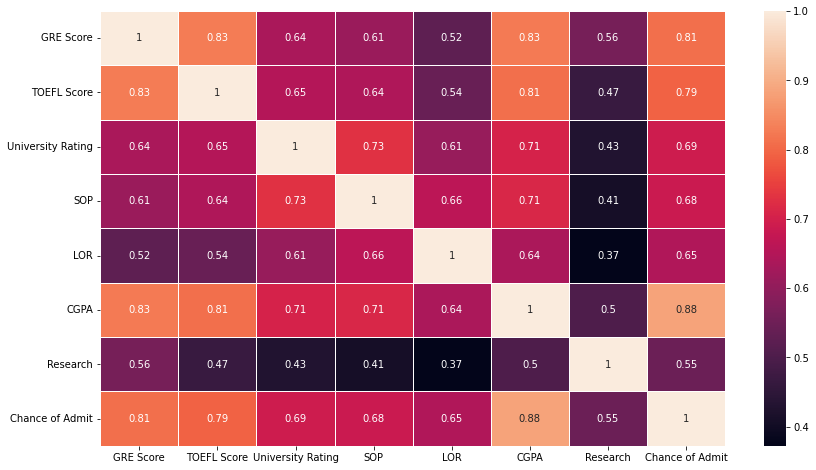

In [23]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), linewidths=.5, annot=True)
plt.show()

**Observations :**
    
* A strong positive relationship exists between Chance of admit and numerical variables (GRE & TOEFL score and CGPA).

**Correlation with respect to Chance of Admit (target variable)**

                   Chance of Admit
Chance of Admit              1.000
CGPA                         0.882
GRE Score                    0.810
TOEFL Score                  0.792
University Rating            0.690
SOP                          0.684
LOR                          0.645
Research                     0.546
----------------------------------------------------------------------------------------------------


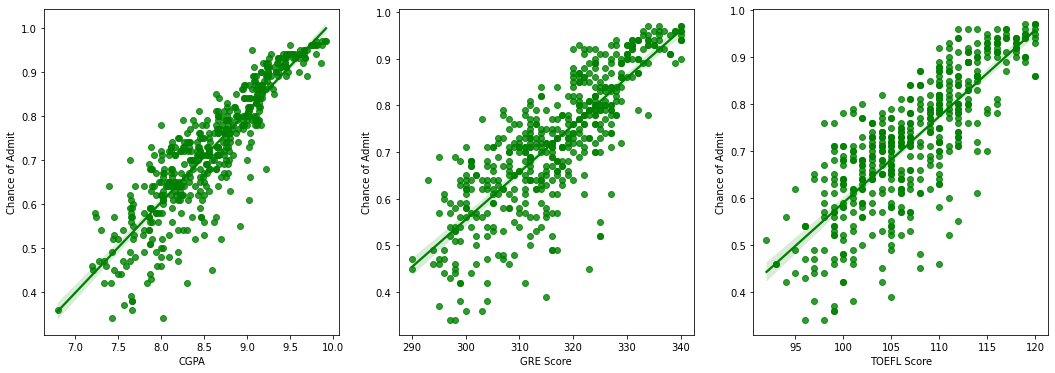

In [24]:
correlation = pd.DataFrame(df.corr()['Chance of Admit']).sort_values(['Chance of Admit'],ascending = False).round(3)
print(correlation)
print("-"*100)

plt.figure(figsize=(18,6))
col = ['CGPA','GRE Score', 'TOEFL Score']
for i in range(len(col)):
    plt.subplot(1,3,i+1)
    sns.regplot(x=col[i], y='Chance of Admit', data = df,color="green")
plt.show()

**Observations :**

* CGPA,GRE Score,TOEFL Score are strongly correlated with Chance of Admit (target variable).

# Linear Regression Model Building

In [25]:
# Train & Test data split using sklearn
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit'], axis=1)
y = df['Chance of Admit']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=42)

In [27]:
print("Train :",X_train.shape,y_train.shape)
print("Test :" ,X_test.shape, y_test.shape)

Train : (400, 7) (400,)
Test : (100, 7) (100,)


In [28]:
#Standardization of data 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cols = X_train.columns
X_train = ss.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns = cols)

X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


**All features considered**

In [29]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression

models = [["Linear Regression:",LinearRegression()],["Lasso Regression :",Lasso(alpha = 0.01)],["Ridge Regression:",Ridge(alpha = 1)]]


for reg_type,model in models:
    print(reg_type)
    model.fit(X_train,y_train.values)
    y_pred = model.predict(ss.transform(X_test))
    # model_coef = pd.DataFrame(model.coef_, columns = ["model coefficients"], index=X_train.columns)
    # print(model_coef.round(4))
    R2_score = r2_score(y_test, y_pred).round(4)
    print("   R2 score :",R2_score)
    Adjusted_R2 = 1 - (1-R2_score)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)
    print("   Adjusted_R2 : ",Adjusted_R2.round(4))
    print("   Mean Squared Error :",mean_squared_error(y_test,y_pred).round(4))
    print("   RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)).round(4))
    print("   MAE :",mean_absolute_error(y_test,y_pred).round(4))
    print("_"*80)
    
    
print("NB :Result without feature elimination ie, we have considered all features for model training.")



Linear Regression:
   R2 score : 0.8188
   Adjusted_R2 :  0.805
   Mean Squared Error : 0.0037
   RMSE : 0.0609
   MAE : 0.0427
________________________________________________________________________________
Lasso Regression :
   R2 score : 0.814
   Adjusted_R2 :  0.7998
   Mean Squared Error : 0.0038
   RMSE : 0.0617
   MAE : 0.0427
________________________________________________________________________________
Ridge Regression:
   R2 score : 0.8188
   Adjusted_R2 :  0.805
   Mean Squared Error : 0.0037
   RMSE : 0.0609
   MAE : 0.0427
________________________________________________________________________________
NB :Result without feature elimination ie, we have considered all features for model training.


**Observations :**

* Comparing R2, adjusted R2 scores and mean squared error values for different regressions, we observe both Linear and Ridge regression have better values compared to Lasso regression. 

**Training model using Statsmodel**

In [30]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # X0 column
model = sm.OLS(y_train.values,X_train).fit() # considers all features
model_coef = pd.DataFrame(model.params, columns = ["Model coefficients"], index=X_train.columns)
print(model_coef.round(4))
print("_"*100)
print(model.summary())

                   Model coefficients
const                          0.7242
GRE Score                      0.0267
TOEFL Score                    0.0182
University Rating              0.0029
SOP                            0.0018
LOR                            0.0159
CGPA                           0.0676
Research                       0.0119
____________________________________________________________________________________________________
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Tue, 09 May 2023   Prob (F-statistic):          3.41e-142
Time:                        11:21:24   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df R

**Observations :**
* The value of R2 score = 0.83 and Adjusted R2 score = 0.82 when all features are considered.
 
>* **Null Hypothesis** : Regression model coefficients for each feature are equal to zero.
>* **Alternate Hypothesis** : Regression model coefficients for each feature are  not equal to zero.

* The p-value for GRE score,LOR,CGPA and Research is less than 0.05 which implies these are significant features.Here p-value > 0.05 for SOP and based on p-value, **we can eliminate the feature SOP as it have no impact on prediction.**

Next we use variation inflation factor to check if multicollinearity exists among features or not

#### **Variance Inflation Factor(VIF)**

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs for the new model
def getVIF(X_train):
    vif = pd.DataFrame()  
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False,ignore_index= True)
    return(vif)

In [32]:
getVIF(X_train) # model with all features

,Features,VIF
0,CGPA,4.65
1,GRE Score,4.49
2,TOEFL Score,3.66
3,SOP,2.79
4,University Rating,2.57
5,LOR,1.98
6,Research,1.52
7,const,1.00


All VIF scores are below 5, indicating no multicollinearity among features.

**All features after eliminating SOP**

In [33]:
# dropped SOP column
X_train_1 = X_train.drop(columns = "SOP")
model_1 = sm.OLS(y_train.values,X_train_1).fit() # SOP not considered
model_coef = pd.DataFrame(model_1.params, columns = ["Model coefficients"], index=X_train.columns)
print(model_coef.round(4))
print("_"*100)
print(model_1.summary())


                   Model coefficients
const                          0.7242
GRE Score                      0.0266
TOEFL Score                    0.0185
University Rating              0.0035
SOP                               NaN
LOR                            0.0163
CGPA                           0.0680
Research                       0.0120
____________________________________________________________________________________________________
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.4
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.01e-143
Time:                        11:21:24   Log-Likelihood:                 561.85
No. Observations:                 400   AIC:                            -1110.
Df R

In [34]:
getVIF(X_train_1) # model with features except SOP

,Features,VIF
0,GRE Score,4.49
1,CGPA,4.48
2,TOEFL Score,3.62
3,University Rating,2.28
4,LOR,1.80
5,Research,1.52
6,const,1.00


**Observations :**

Evenafter removal of SOP feature, the model performance is found better upon analysis of R2 score.There is no significant change in R2 score which suggests our decision of dropping SOP is correct.

Next we perform the testing of model

**Testing model after feature elimination**

In [35]:
X_test = ss.transform(X_test)
X_test = pd.DataFrame(X_test,columns = cols)
X_test = sm.add_constant(X_test)
eliminated_cols = list(set(X_test.columns).difference(set(X_train_1.columns)))
X_test_1 = X_test.drop(columns =eliminated_cols)
X_test_1.head()

,const,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,1.0,1.576604,1.424271,0.775459,0.021730,1.597217,0.895434
1,1.0,-0.248961,0.109306,0.775459,0.564984,0.764683,0.895434
2,1.0,-0.157683,-0.383805,-0.972054,-1.064777,-1.549762,-1.116777
3,1.0,-0.431518,0.273677,-0.098298,-0.521524,0.181909,-1.116777
4,1.0,0.846378,0.766789,-0.098298,-0.521524,0.781333,0.895434


In [36]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression

models = [["Linear Regression:",LinearRegression()],["Lasso Regression :",Lasso(alpha = 0.01)],["Ridge Regression:",Ridge(alpha = 1)]]

for reg_type,model in models:
    print(reg_type)
    model.fit(X_train_1,y_train.values)
    y_pred_1 = model.predict(X_test_1)
    # model_coef = pd.DataFrame(model.coef_, columns = ["model coefficients"], index=X_train.columns)
    # print(model_coef.round(4))
    R2_score = r2_score(y_test, y_pred_1).round(4)
    print("   R2 score :",R2_score)
    Adjusted_R2 = 1 - (1-R2_score)*(len(y_test)-1)/(len(y_test)-X_train_1.shape[1]-1)
    print("   Adjusted_R2 : ",Adjusted_R2.round(4))
    print("   Mean Squared Error :",mean_squared_error(y_test,y_pred_1).round(4))
    print("   RMSE :",np.sqrt(mean_squared_error(y_test,y_pred_1)).round(4))
    print("   MAE :",mean_absolute_error(y_test,y_pred_1).round(4))
    print("_"*80)
print("NB :Result with feature elimination ie, we have considered all features except SOP for model training.")   

Linear Regression:
   R2 score : 0.8188
   Adjusted_R2 :  0.805
   Mean Squared Error : 0.0037
   RMSE : 0.0609
   MAE : 0.0427
________________________________________________________________________________
Lasso Regression :
   R2 score : 0.814
   Adjusted_R2 :  0.7998
   Mean Squared Error : 0.0038
   RMSE : 0.0617
   MAE : 0.0427
________________________________________________________________________________
Ridge Regression:
   R2 score : 0.8187
   Adjusted_R2 :  0.8049
   Mean Squared Error : 0.0037
   RMSE : 0.0609
   MAE : 0.0427
________________________________________________________________________________
NB :Result with feature elimination ie, we have considered all features except SOP for model training.


**Observations :**

* Comparing R2, adjusted R2 scores and mean squared error values for different regressions, we observe both Linear and Ridge regression have better values compared to Lasso regression. 

## Assumptions of  Linear Regression model


* Multicollinearity check by VIF score
* Mean of residuals
* Linearity of variables
* Test for Homoscedasticity
* Normality of residuals

#### 1)  Multicollinearity check by VIF score

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF Score"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif.sort_values(by="VIF Score", ascending=False).reset_index(drop=True).round(3)

,Features,VIF Score
0,CGPA,4.655
1,GRE Score,4.490
2,TOEFL Score,3.664
3,SOP,2.786
4,University Rating,2.572
5,LOR,1.978
6,Research,1.518
7,const,1.000


**Observations :**

* All the VIF Score are less than 5 which gives idea that multicolinearity is not present in the data.
* Maximum Score of VIF is for CGPA.

#### 2)  Mean of Residuals

In [38]:
residual = y_test - y_pred
print(f"The mean value of residual is {residual.mean().round(5)} which is nearly equal to zero")

The mean value of residual is -0.00545 which is nearly equal to zero


The mean of residuals is nearly zero.

#### 3) Linearity of variables

<AxesSubplot:title={'center':'Residual plot'}, xlabel='Predicted values', ylabel='Residuals'>

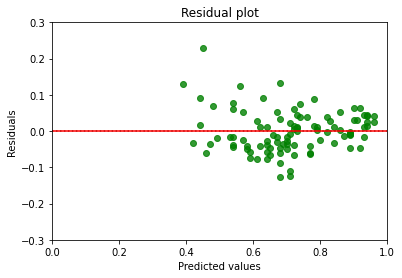

In [39]:
sns.residplot(x=y_test, y=y_pred, color='green');
plt.ylim(-0.3,0.3)
plt.xlim(0,1)
plt.ylabel("Residuals");
plt.xlabel("Predicted values");
plt.title("Residual plot");
sns.lineplot([0,25],[0,0],color="red")

**Observations**

* The residuals are scattered around the reference line and have no pattern in the residual plot.This implies there is no problem of heteroscedasticity.

<Figure size 1440x504 with 0 Axes>

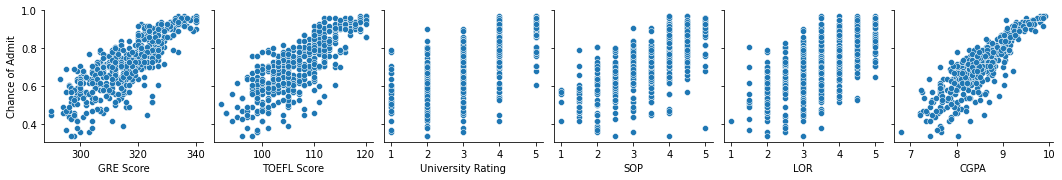

In [40]:
plt.figure(figsize=(20, 7));
sns.pairplot(data=df, y_vars=["Chance of Admit"] , x_vars=["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA"])

**Observations :**

* There exists linear relationship between the Chance of Admit(dependent variable) and every independent features considered.
* All the scatter plots do not have any funnel type distribution of data ie, no pattern in the scatterplot which signifies the presence of Homoscedasticity.

#### 4)  Test for Homoscedasticity 

Text(0, 0.5, 'y_pred')

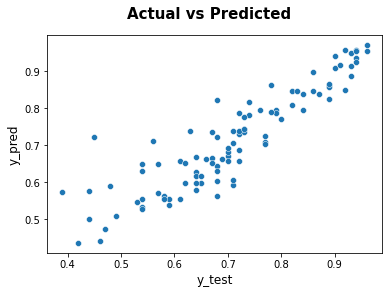

In [48]:
# Method 1
fig = plt.figure()
sns.scatterplot(y_test,y_pred)
fig.suptitle('Actual vs Predicted', fontsize=15,fontweight='bold')             
plt.xlabel('y_test', fontsize=12)                   
plt.ylabel('y_pred', fontsize=12) 

The scatterplot between actual values and predicted values shows no pattern in their spread which supports the presence of Homoscedasticity.

In [42]:
# Method 2
import statsmodels.stats.api as sms
residual = y_test - y_pred
statistic = ["F statistic","p_value"]
test = sms.het_goldfeldquandt(residual,X_test)
print("F statistic :",test[0].round(4))
print("p_value :",test[1].round(4))

F statistic : 0.5421
p_value : 0.9748


* Null hypothesis :  **Error terms are homoscedastic**.
* Alternative hypothesis: **Error terms are heteroscedastic**

Here p-value > 0.05 ie, we fail to reject the null hypothesis ie, Error terms are homoscedastic in nature.

#### 5)  Normality of residuals

Text(0.5, 1.0, 'Distribution of residuals')

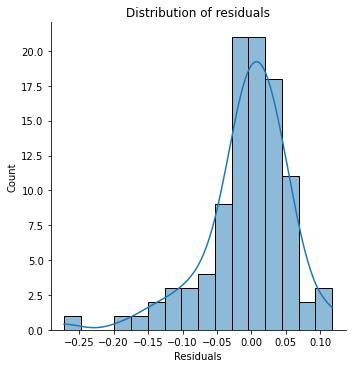

In [43]:
residual = y_test - y_pred
sns.displot(x=residual, kde=True)
plt.xlabel("Residuals");
plt.title("Distribution of residuals")

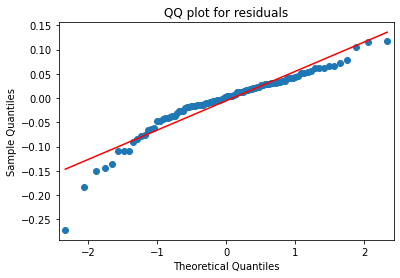

In [44]:
import statsmodels.api as sm
sm.qqplot(residual, line = 's')
plt.title("QQ plot for residuals")
plt.show()

**Observations :**

* The Distribution of the residual errors are approximately normally distributed and it looks very much like a bell curve.
* Using QQ-plot we can visualize that the distribution of residuals are very close to Gaussian distribution.

## Model performance

**Performance analysis based on metrics**

In [45]:
# after feature elimination
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error

R2 = r2_score(y_test,y_pred_1)
adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_train_1.shape[1]-1)
mae = mean_absolute_error(y_test,y_pred_1)
mse = mean_squared_error( y_test, y_pred_1)
rmse = np.sqrt( mean_squared_error( y_test, y_pred_1))
mape = mean_absolute_percentage_error(y_test,y_pred_1)

# initialise data of lists.
perf_data = [[R2],[adj_R2],[mse],[rmse],[mae],[mape]]

# Creates pandas DataFrame.
metrics = pd.DataFrame(perf_data,columns= ["Scores"] ,index = ["R-Squared","Adjusted_R2","Mean Square Error",
                                                             "Root Mean Square Error","Mean Absolute Error",
                                                             "Mean Absolute Percentage Error"])
metrics

,Scores
R-Squared,0.818748
Adjusted_R2,0.804957
Mean Square Error,0.003707
Root Mean Square Error,0.060882
Mean Absolute Error,0.042713
Mean Absolute Percentage Error,0.068537


**Observations :**
    
* R2 score - 0.818748
>* This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.As seen above our residual plot looks good, which means we donot have any bias in our model.
>* R-squared does not indicate if a regression model provides an adequate fit to your data. A good model can have a low R2 value. On the other hand, a biased model can have a high R2 value.

Here R2 value is not too low or too high, which implies that our model is a good model and do not have any bias.
* Mean Absolute Error - 0.042713
>* MAE describes the typical magnitude of the residuals. Small MAE suggests the model is great at prediction, while a large MAE suggests that your model may have trouble in certain areas. There is scope of improvement.

As MAE value is slightly on the lower side, this mean our model is good but not the perfect model. There is further chance of improvement.
* Root Mean Square Error - 0.060882
>* RMSE is defined as the square root of the average squared difference between the predicted and the actual score. The lower the RMSE, the better a model fits a dataset.

A huge difference between the RMSE and MAE indicates outliers. A smaller difference indicates less outliers in our case.
* Mean Square Error - 0.003707
>* MSE equation is most apparent with the presence of outliers in our data.
>* While each residual in MAE contributes proportionally to the total error, the error grows quadratically in MSE.This means that outliers in our data will contribute to much higher total error in the MSE than they would the MAE.
* Mean Absolute Percentage Error - (approx. 6% error)
>* MAPE is biased towards predictions that are systematically less than the actual values themselves.MAPE will be lower when the prediction is lower than the actual compared to a prediction that is higher by the same amount.

**Hence our model is 94% correct in prediction.**


**Performance analysis based on visualization**

<AxesSubplot:xlabel='Chance of Admit', ylabel='Density'>

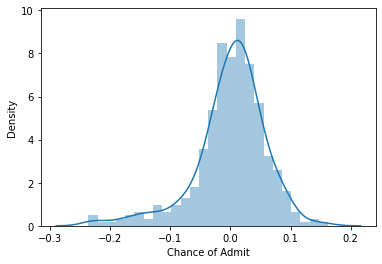

In [46]:
# Train performance
model = LinearRegression().fit(X_train_1,y_train.values)
y_train_pred = model.predict(X_train_1)
residual = y_train - y_train_pred
sns.distplot(residual)

Text(0, 0.5, 'Predicted values')

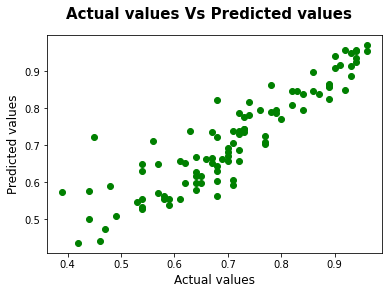

In [47]:
# Test performance -> Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred,color='green')
fig.suptitle('Actual values Vs Predicted values', fontsize=15,fontweight='bold')             
plt.xlabel('Actual values', fontsize=12)                   
plt.ylabel('Predicted values', fontsize=12) 

**Observations :**
Based on above visualizations,we observe that the model is a good estimator for predicting chance of admission based on related factors.

## Conclusion

* According  to  the  linear  regression  model  applied,  the equation that represents regression model is:

**Model Eqn = 0.7242 +  ( 0.0266 * GRE Score) + (0.0185 * TOEFL Score) + (0.0035 * Uni.Rating) + (0.00 *  SOP) + (0.0163 * LOR) + (0.0680 * CGPA) +  (0.0120 * Research)**

* According to p-value from the linear regression test, all  variables  have  a  statistically  significant  role  except  for   SOP.  Also, the  R-squared value = 0.821. which means that 82% of variation in our dataset can be explained with our model.

* The p-value for the F-test of overall significance test is less than the significance level (0.05),hence we can reject the null-hypothesis and conclude that your model provides a better fit than the intercept-only model.In other words, the model is statistically significant.

## Business Insights and Recommendations



* Based on our data analysis,
>* The key features which influence the chance of admission are GRE Score, Research,LOR,TOEFL Score and CGPA.
>* A higher University rating will increases the chance of admission.
Universities with higher rating have more Research opted applicants.
>* A higher value of LOR and SOP will also increases the chance of admission for the student.
>* Applicants who opts for research tends to have higher GRE Score and the Chance of Admit.
>* There exists a strong positive relationship between Chance of admit and numerical variables (GRE & TOEFL score and CGPA).
>* We found that TOEFL and CGPA are highly correlated with GRE scores, hence these variables can also be used in exchange for GRE score.

**Predictor Variables :**
* Based on the model coefficients of Linear regression, CGPA, GRE Score, TOEFL Score and Letter of Recommendations has the most impact as a feature. So a applicant with higher CGPA with strong GRE Score/TOEFL Score and Letter of recommendation have very high chances of admission in IVY league institutions.
* The Linear regression coefficients for Research is higher than the University ranking and Statement of purpose(SOP). This indicates that opting Research is one of the important features in the data.

**Possible Model Improvement Areas:**
1. First and foremost, more data can really help specifically with the applicants, who have low to mid level of scores.
2. It would be critical to acquire more features to make this model’s accuracy better.Features like GRE-TOEFL-CGPA ratios, SAT Score, Certifications, 'Global Language expertise', 'Publication Records' are some of the examples.

**Potential business benefit :**
* This regression model can really cater the ever increasing need to answering one of the most curious question, probability of getting admissions into the IVY league institutions.Also, model could indirectly target those candidates who are currently on the low end of the spectrum and provide them a tailor made curriculum to help them progress.

* Inorder to improve the model performance and for highly accurate results ,model has to be trained with additional data sources for model improvement.For this better marketing strategy can be devised to create awareness about possibilities of study abroad test prep and admission counselling centres among intermediate and college levels through various platforms like social media, mass media, campaigns etc.Refferal schemes can be introduced among students to have better reach on target audience.

* User-review together with refferal option can also be included while predicting the chance of admit through which more data can be collected for model training.Customer suggestions upon features which are important in improving the performance of the model can also be requested for better model implementation in real world scenarios.




----